# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [5]:
# code for solving the model (remember documentation and comments)
import numpy as np
import math 
from scipy import optimize
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
#define values for the variables
m = 1
v = 10
e = 0.3
t_0 = 0.4
t_1 = 0.1
k = 0.4
#objection function
def obj(c,l,v,e):
    return np.log(c) - v*(l**(1+1/e))/(1+1/e)
    
#create a function for minimizing utility
def u(l,m,w,v,e,t_0,t_1,k):
    c = m + w*l-(t_0*w*l + t_1*max(w*l-k,0))
    return -obj(c,l,v,e)

#optimization problem 
def opt(w,m,v,e,t_0,t_1,k):
    sol = optimize.minimize_scalar(u,bounds=(0,1),args=(w,m,v,e,t_0,t_1,k))
    l = sol.x
    c = m + w*l +(t_0*w*l + t_1*max(w*l-k,0))
    return [c,l]

# Question 2

ADD ANSWER.

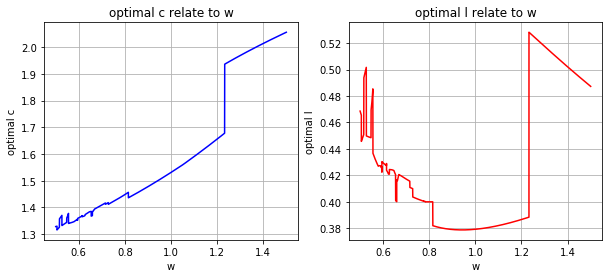

In [7]:
# create the empty list of optimal value of c and l 
ls = []
cs = []
n = 10000
# loop through w from 0.5 to 1.5 with n values
ws = np.linspace(0.5,1.5,n)  
for i in ws:
    opt_value = opt(i,m,v,e,t_0,t_1,k)
    cs.append(opt_value[0])
    ls.append(opt_value[1])
    
# plot the figure
%matplotlib inline
fig = plt.figure(figsize=(10,4))
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(ws,cs,color='Blue')

ax_left.set_title('optimal c relate to w')
ax_left.set_xlabel('w')
ax_left.set_ylabel('optimal c')
ax_left.grid(True)

ax_right = fig.add_subplot(1,2,2)
ax_right.plot(ws,ls,color='Red')

ax_right.set_title('optimal l relate to w')
ax_right.set_xlabel('w')
ax_right.set_ylabel('optimal l')
ax_right.grid(True)

# Question 3

ADD ANSWER.

In [8]:
# calculate the tax revenue T with uniformly distributed w from 0.5 to 1.5 
def tax_rev(w,m=1,v=10,e=0.3,t_0=0.4,t_1=0.1,k=0.4):
    T = 0 
    for i in ws: # calculate tax revenue for each i 
        opt_value = opt(i,m,v,e,t_0,t_1,k)
        l_0 = opt_value[1]
        T += t_0*i*l_0 + t_1*max(i*l_0-k,0) # adding all the taxes collected from each i 
    return T
print("tax revenue" + " " + str(tax_rev(i)))

tax revenue (1827.5264150975029-94.82058226859338j)


# Question 4

ADD ANSWER.

In [20]:
# change e from 0.3 to 0.1
def new_tax_rev(w,m=1,v=10,e=0.1,t_0=0.4,t_1=0.1,k=0.4):
    T = 0
    for i in ws:
        opt_value = opt(i,m,v,e,t_0,t_1,k)
        l = opt_value[1]
        T += t_0*i*l + t_1*max(i*l-k,0)
    return T
print ("tax revenue" + " " + str(new_tax_rev(i)))

tax revenue -10001.448484960589


# Question 5

ADD ANSWER.

In [18]:
# define opt_tax_rev function which calculates the optimal tax revenue.
def opt_tax_rev(x,w,v=10,e=0.4,m=1):
    # define a vector x which includes t_0,t_1 and k
    t_0 = x[0]
    t_1 = x[1]
    k = x[2]
    return -tax_rev(i)

initial_guess=[0.4,0.1,0.4]
sol = optimize.minimize(opt_tax_rev,initial_guess,method='SLSQP',args=(i,v,e,m))

t0_opt = sol.x[0]
t1_opt = sol.x[1]
k_opt = sol.x[2]

print ("optimal t_0"+ str(t0_opt))
print ("optimal t_1"+ str(t1_opt))
print ("optimal k" + str(k))


ValueError: Objective function must return a scalar

# Conclusion

In question 1 and question 2 we have found out that the optimal c gets higher when w increases within 0.5 to 1.5, while optimal l becomes the largest when w around 1.2. From the result of question 3 and question 4 we have also concluded that by decreasing the value of epson from 0.3 to 0.1 the total tax revenues has also decreased. 